# 2. Digital Signal Processing (DSP)

The purpose of this Notebook is to go over a number of topics studied with Mr De Bruyne in the Signals & Systems course (without going as far into the mathematical developments as the course does, the idea here is rather to refresh you to the sequence of concepts), and to show you how to exploit them using Python. All the illustrations used in this document are taken from Mr De Bruyne's course.

## 1 - Frequency content of a periodic signal

**Any periodic time signal $f(t)$ (of period T) can be reconstructed exclusively by means of a sum of sinusoids of different frequencies, amplitudes and phases, using the mathematical tool known as "Fourier series"**. These sinusoids are presented in the form of complex exponentials:

![](./img1.png)

with :  
- $c_0$, the DC component (ou average) of the time signal
- $\omega_0$ which is the fundamental frequency : $\omega_0 = \frac{2\pi}{T}$ and $T$ the period of the time signal $f(t)$ 
- $k\omega_0$ being the frequency of the harmonic of rank $k$.

It is common practice to represent a temporal signal $f(t)$ as a function of time (green curve on the graph below).

However, on the basis of what the Fourier Series decomposition proposes, an alternative representation can be proposed, by displaying **the "spectrum" of the signal**. This frequency representation **highlights the amplitude and the phase of each sinusoidal component contained in the signal $f(t)$**:

![](./img2.png)

This frequency representation is a tool that is intensively used in signal processing.

One observes that the frequency spectrum obtained is a **discrete spectrum**: there are values only for some particular values of frequency: the DC component, the fundamental and the harmonics. There is no sinusoidal component of other frequency contained in this periodic time signal.

Note also that the x-axis of this representation can be (as here above) graduated according to the rank of the sinusoidal component, but could also have been graduated according to the frequency $\omega$ or $f$. These representations are equivalent.

One also observes that the **spectrum** obtained is **symmetrical in amplitude on either side of the DC component** (which corresponds to $k = 0$) and that its **phase** is **of opposite sign** on either side of this same component. This makes sense: we know that we can **reconstruct a sinusoid as a sum of 2 vectors rotating at the same speed but in opposite directions**, these vectors having the same amplitude and phases of opposite signs:

![](./img3.png)

This sum of vectors rotating at the same speed but in opposite directions is also observed in the expression of the Fourier series:

$$c_0 + \sum_{k=1}^{\infty} \left[ c_k e^{jk\omega_0t} + c_{-k} e^{-jk\omega_0t} \right]$$

with:

- $c_k$ and $c_{-k}$ having the same norms but opposite phases
- the 2 complex exponentials $e^{jk\omega_0t}$ and $e^{-jk\omega_0t}$ rotating at the same speed $k\omega_0$ but in opposite directions

## 2 - Frequency content of an aperiodic signal

**Any non-periodic time signal $f(t)$ can also be reconstructed exclusively using a sum of sinusoids of different frequencies, amplitudes and phases, using the mathematical tool known as the "inverse Fourier Transform".**

The idea, to find the expression, is to start again from the expression of the Fourier series and to pretend the period $T$ of the signal $f(t)$ is infinite. Thus, the sum of the pulse components $k\omega_0$ becomes an integral with respect to $d\omega$, and the Fourier coefficients $c_k$ become a continuous function $F(\omega)$

This transform has its counterpart allowing not to reconstruct the temporal signal on the basis of the frequency content, but **to determine the frequency content of a given aperiodic temporal signal**, we speak of the **"Fourier Transform"**:

![](./img4.png)

The sinusoids are once again presented in the form of complex exponentials.

We recall that this Fourier transform is a special case of the Laplace transform. A special case that characterizes the time signal $f(t)$ only on the basis of sinusoids, where the Laplace transform is also interested in its content in terms of real exponential:

![](./img5.png)

The frequency spectrum obtained for this aperiodic time signal is this time a **continuous spectrum**:

![](./img6.png)

Note that the x-axis of this representation has been scaled according to the frequency $f$ in the above representation.

Note also that the spectrum is again symmetrical in amplitude around the zero frequency, as in the case of the spectrum of the periodic signal.

## 3 - Principle of sampling a temporal signal

Both temporal signals (periodic and aperiodic) presented above are 2 continuous signals: the functions are defined for any value of time $t$.

When one wishes to use computer tools (such as Python for example) to exploit and process a signal $f(t)$, **it is necessary to sample this continuous signal in order to obtain a discrete signal**, as the processing of continuous data is impossible for computers.

The idea of sampling a continuous signal $f(t)$ is to "catch" its amplitude at specific times spaced by a period called **sampling period** $T_s$ . In this way, we obtain a discrete signal $f(kT_s)$ noted $f_s(t)$, whose value is defined only at the sampling times.

From a mathematic perspective, **this sampling of a continuous signal $f(t)$ is done using a function called "Dirac comb" and noted $\delta_{T_s}(t)$**. By calculating the product between the continuous signal $f(t)$ and this comb $\delta_{T_s}(t)$, we calculate $f_s(t)$:

![](./img7.png)

If we try to represent the frequency spectrum of the Dirac comb, we can see that it is discrete, which sounds logical, as the signal $\delta_{T_s}(t)$ is periodic. We also observe that the lines are spaced by a frequency $\omega_s = \frac{2\pi}{T_s}$ and are of constant amplitude $\frac{2\pi}{T_s}$, and this on a frequency range from $-\infty$ to $+\infty$:

![](./img8.png)

In the blue representation above, the spectrum has been represented only for positive frequencies $\omega$, but it is again symmetrical around $\omega = 0$, as in the 2 previous cases.

## 4 - Sampling of a temporal signal: Nyquist condition to obtain a correct sampling

By sampling the continuous time signal, we inevitably lose some of the information it contained: indeed the values between 2 samples are not known: 

![](./img9.png)

We can legitimately ask ourselves the question of how much information we can lose while still being able to characterize the original continuous signal, knowing that if we take a smaller sampling period $T_s$, we will lose less information, but the volume of data to be processed will increase. In other words: what is the largest sampling period I can accept without compromising the characterization of my signal based on its sinusoidal content?

The answer is that it is absolutely necessary to have at least one sample per half-period of the largest frequency contained in the time signal.

Indeed, with one sample per half-period, we can reconstruct the sinusoidal component without ambiguity:

![](./img10.png)

This is also the case if there is more than one sample per half period of the sinusoidal component:

![](./img11.png)

This will not be the case if you have less:

![](./img12.png)

It will then appear that it is the red dotted signal that is present, and not the green signal. Note that the red signal has a lower frequency than the green signal. From this observation, we can conclude that we will not be able to observe the sinusoidal components contained in the time signal of which we do not have, after sampling, at least one value per half-period: we will see these components at a frequency lower than the real frequency.

It is thus necessary that the sampling period $T_s$ is not greater than $\frac{T}{2}$, $T$ being the period of the fastest sinusoidal component contained in the temporal signal. Or in other words: one will not be able to characterize correctly the sinusoidal components of frequency $\omega > \frac{\omega_s}{2}$. This particular frequency $\frac{\omega_s}{2}$ will be noted $\omega_N$ **and called "Nyquist frequency". It naturally depends on the sampling step: $T_s$: $\omega_N = \frac{\omega_s}{2} = \frac{\pi}{T_s}$**.

**We will assume in the following developments that this condition is respected**.

## 5 - Frequency spectrum of a sampled signal: phenomenon of spectral replicas

If we now try to compare the **frequency spectrum of a sampled temporal signal $f_s(t)$** with the spectrum of the same signal $f(t)$ but continuous this time we obtain the graph represented below with :

- In green the spectrum of the continuous signal
- In blue the spectrum of the sampled signal (assuming that the Nyquist condition is respected)

We observe that the spectrum of the discrete signal is similar to that of the continuous signal, with 2 exceptions:

- The spectrum of the sampled signal has the **amplitude** of the spectrum **of the continuous signal multiplied by a factor $\frac{1}{T_s}$** 
- The spectrum of the continuous signal is **replicated around the pulses $k\omega_s$** to obtain the spectrum of the discrete signal:

![](./img13.png)

We can thus observe that **the fact of sampling a signal has an influence on its frequency representation** (we went from the green to the blue curve).

The spectrum of the Dirac comb illustrated in paragraph 3 allows to explain the appearance of the spectral replicas as well as their placement (they are all centered around $k\omega_s$) and modified amplitude:

- In the time domain, the sampled signal was obtained by computing the product of the continuous signal and the Dirac comb: $f_s(t) = f(t)\delta_{T_s}(t)$ 
- The frequency counterpart of a product of 2 functions in the time domain is the convolution product of their spectra (and conversely: the counterpart of the convolution product of 2 functions in the time domain is the product of their spectra in the frequency domain)
- This convolution operation is equivalent to gradually sliding one of the signals over the other and calculating the product each time. Doing so, spectral replicas of the spectrum of the continuous signal appear, centered on the frequency components contained in the Dirac comb:

![](./img14.png)

**If we want to characterize the continuous signal with the help of the previously correctly sampled signal, we will have to take care to keep only the central replica (by keeping the spectrum of the sampled signal only the frequencies going from $-\frac{\omega_s}{2}$ to $\frac{\omega_s}{2}$), the others being due to the sampling of the signal**, and then to correct the amplitude obtained.

We can summarize the approach taken so far with this diagram:

![](./img15.png)

## 6 - Frequency spectrum of a sampled signal : DTFT

As a reminder, the objective of signal processing is to characterize any temporal signal using computer tools, and here more precisely with Python.

Practically, the continuous temporal signal is not known by the computer tool which will try to characterize it: only the samples are known. The signal used to feed a signal processing algorithm is thus not $f(t)$ but $f[kT_s]$, that will be noted $f[k]$. Therefore, the integral of the Fourier transform becomes a sum (since time is no longer continuous but discrete). This sum can rigorously be processed by a processor, whereas an integral can only be approximated.

The mathematical tool to **calculate the frequency content of a sampled signal** is called **DTFT: Discrete-Time Fourier Transform**:

![](./img16.png)

We can deduce the expression by replacing $t$ by $kT_s$ in the expression of the Fourier Transform. This expression supposes that the temporal signal was sampled on an infinite temporal duration (since $k$ goes from $-\infty$ to $+\infty$), which in practice will of course never arrive: in reality the number of samples of the temporal signal will be finite, we will note it $N$.

The **variable $\Omega$**, which is called **discrete frequency** and is expressed in [rad], appears in this mathematical developpment. We will not dwell on this variable in this Notebook, as it is not directly exploited in the final tool that we will use. Note however that **this variable, despite what its name implies, is a continuous variable**, which makes the DTFT not exploitable with computer tools. **We will therefore have to discretize this frequency $\Omega$**.

## 7 - Discrete frequency spectrum of a sampled signal: DFT

We will therefore sample **this discrete frequency $\Omega$** by writing $\Omega = \Omega_n = \frac{2\pi n}{N}$ with:

- $n$ the index of the sampled discrete frequency
- $N$ the number of samples of the temporal signal.

... which, brought back to the pulsation (more practical and understandable) gives us the following sampling: $\omega = \frac{\Omega}{T_s} = \frac{n}{N}\omega_s = \frac{n}{N}2\omega_N$.

Doing so, we finally reached the tool called **Discrete Fourrier Transform** or **DFT**:

![](./img17.png)

We thus started from a sampled temporal signal of which we have a total of $N$ samples spaced of the period of sampling $T_s$, $k$ being the index of these temporal samples. We obtained, thanks to the DFT, a representation of its frequency content using a spectrum discretized on a range $\omega$ going from $0$ to $\omega_s$, by step $d\omega = \frac{\omega_s}{N}$, $n$ being the index of these frequency samples.

Alternatively, we can express the **frequency resolution** in Hz: $dF = \frac{F_s}{N}$.

**The DFT is a tool that can be processed by a processor, since the data it receives and the data it calculates in return are all discrete**.

## 8 - Practical implementation of the DFT : FFT

In practice, computer tools do not generally implement the DFT, but the **FFT: Fast Fourier Transform**. This is not a new transform, but rather **an algorithm that allows a more efficient implementation of the DFT**, thus reducing the computation time required for the CPUs in charge of applying the DFT.

### 8.1 - Creation of the sampled time signal

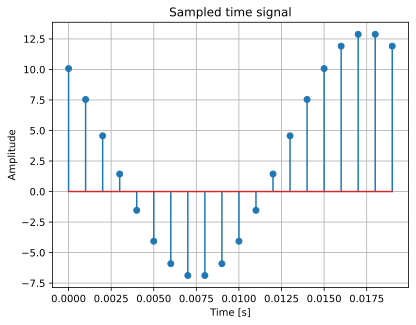

In [37]:
import numpy as np
from matplotlib import pyplot as plt

# better plots in jupyter
%config InlineBackend.figure_formats = ['svg']

# Creation of the sampled time signal, containing a sine wave of frequency 50 Hz and
# 10V amplitude, and a DC component. Sampling happens every ms.
# We manage to get 20 samples, so that we have a complete period of the sine % wave.

N = 20                       # Number of samples
Ts = 0.001                   # Sampling period
fu = 50                      # Sine wave frequency
t = np.arange(0, N*Ts, Ts)   # Time vector creation
u = 3 + 10 * np.cos(2 * np.pi * fu * t + np.pi / 4)

plt.stem(t, u)
plt.title("Sampled time signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

We have created a discrete time signal, as expected:

![](./img18.png)

### 8.2 - Application of the FFT using Python

The Numpy function `fft()` compute the FFT, of course we have to give as input the sampled time signal :

In [3]:
X = np.fft.fft(u)

As a result, we get a vector containing the N frequency lines, in the form of complex numbers :

In [4]:
len(X)

20

By computing the norm and angle, we get the amplitudes and phases of each sine wave component :

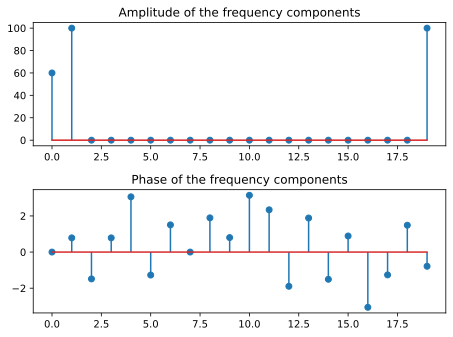

In [5]:
Amp=np.abs(X)              # We compute the norm of each vector component
Ph=np.angle(X)             # We compute the phase of each vector component
plt.subplot(2,1,1)
plt.stem(Amp)
plt.title('Amplitude of the frequency components')
plt.subplot(2,1,2)
plt.stem(Ph)
plt.title('Phase of the frequency components')
plt.tight_layout()
plt.show()

We notice that Numpy calculates phases for components whose amplitude seems to be zero. This is a numerical calculation error, we can easily clean up the phase spectrum: 

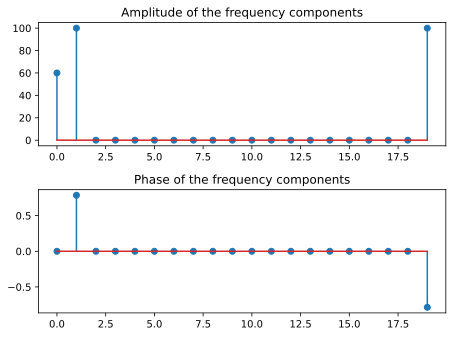

In [6]:
Ph[Amp<0.1]=0           # We delete the not relevant phase lines
plt.figure()
plt.subplot(2,1,1)
plt.stem(Amp)
plt.title('Amplitude of the frequency components')
plt.subplot(2,1,2)
plt.stem(Ph)
plt.title('Phase of the frequency components')
plt.tight_layout()
plt.show()

We worked here with a temporal signal constructed with a cosine, which suits us well, since this function is real:

![](./img18.5.png)

What do you think you would get by replacing this cosine with a sine? Feel free to test by adapting the code.

### 8.3 - Interpretation of the "raw" spectrum obtained and usual corrections :

We can now ask ourselves 3 questions:

- What amplitudes of the lines were we expecting, and do the values obtained match?
- Why do we have a line at index 1 and one at index 19?
- How to scale the x-axis in order to obtain interpretable data?

Let's start by **scaling the x-axis**: We know that by providing $N$ temporal data to the FFT algorithm, we obtain $N$ frequency data. We also know that the highest frequency component that could be observed is determined by the Nyquist frequency $F_N$ which depends on the sampling frequency of the time signal: $F_n = \frac{F_s}{2}$. This frequency component will be observable for a positive frequency, but also for a negative frequency (remember the vectors rotating in both directions, paragraph 1 of this Notebook). The width of the frequency range covered is therefore equal to 2 times the Nyquist frequency, so it is equal to the sampling frequency $2F_N = F_s$. Knowing that we have $N$ frequency data, we can calculate the spacing between these data: $dF = \frac{F_s}{N}$. This is the **frequency resolution** that we calculated in the previous paragraph.

In [ ]:
Fs = 1 / Ts         # The sampling frequency
FNyquist = Fs / 2   # We observe Nyquist condition is respected : our 50 Hz component is lower than the
                    # Nyquist frequency
FNyquist

500.0

In [8]:
dF = Fs / N
dF

50.0

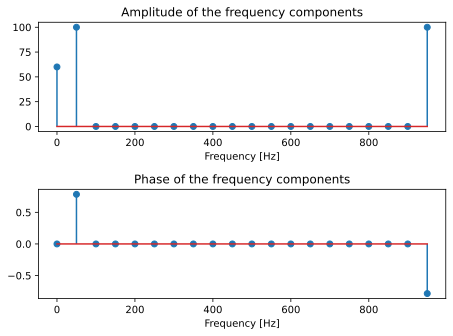

In [9]:
n = np.arange(N)  # Indexes of the vector of frequencial data
f = n * dF        # The vector of the frequencies for our x-axis
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

We can go back to the second question and rephrase it now: why do we have a line at the frequency of 50 Hz and one at 950 Hz?

To answer this question, we must remember the phenomenon of spectral replicas due to the use of a sampled temporal signal. **The FFT does not in practice return the central replica (the one centered at 0 Hz), but the upper half of this replica, and the lower half of the replica centered at $F_s$:**

![](./img19.png)

This is not a problem, since we know that this replica is identical to the central replica. We can ask Numpy to represent only the central replica, as expected, using the `fftshift()` function. We must then adapt the vector of x-axis accordingly:

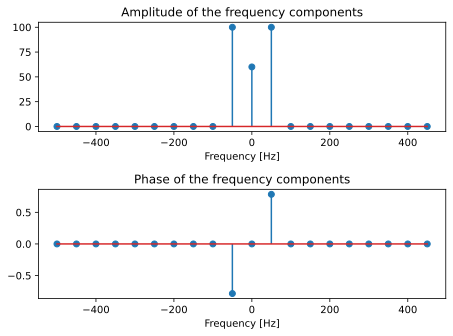

In [10]:
X = np.fft.fftshift(X)
Amp = np.abs(X)                                # We compute the norm of each vector component
Ph = np.angle(X)                               # We compute the phase of each vector component
Ph[Amp<0.1] = 0
f = np.arange(-FNyquist, FNyquist, dF)   # The vector of the frequencies for our x-axis
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

We now obtain the expected pattern: 2 lines of identical amplitude, rotating at the same speed but in opposite directions, and with phases of opposite sign. However, we notice that the amplitude of the lines is not the expected one: our component at 50 Hz being of amplitude 10 V, but here we have 2 components of amplitude 100 V. This is due to the fact that the **DFT presents the spectrum by multiplying its amplitude by a factor $N$**, the number of samples provided to the algorithm.

![](./img20.png)

It will therefore be necessary to divide the amplitude by this factor $N$:

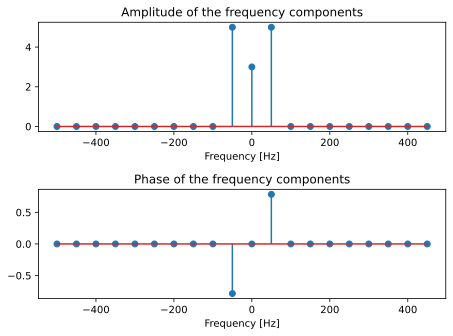

In [11]:
Amp = np.abs(X) / N       # We divide the amplitude by the number of samples (legacy of the DFT)
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

We now have 2 lines of 5 V amplitude, placed at -50 and 50 Hz, with the expected phase, to constitute our sinusoid of 10 V amplitude oscillating at 50 Hz.

### 8.4 - Conventional representation of the frequency spectrum :

In practice, we will not represent the negative frequency components, but only the positive ones. It is more practical this way: we don't have to sum the 2 rotating vectors, and we obtain directly the characteristics of the temporal signal in a more readable way.

**We will therefore keep only the upper part of the frequency spectrum obtained, and multiply the amplitude by 2, to compensate for the disappearance of the second component.** Of course, this does not apply to the DC component:

In [12]:
X = np.fft.fft(u)
Amp = np.abs(X) / N     # We divide the amplitude by the number of samples (legacy of the DFT)
Amp = Amp[:N//2+1] * 2  # We multiply by 2 the amplitudes and we keep only the upper half of the
                        # spectrum for the convenience of the representation...
Amp[0] = Amp[0] / 2     # ... except for the DC component
 
Ph = np.angle(X)        
Ph = Ph[:N//2+1]        # We keep only the upper half of the spectrum
Ph[Amp<0.1] = 0         # We correct the errors of numerical calculation on the phases
 
dF = Fs / N             # The frequency resolution
dF

50.0

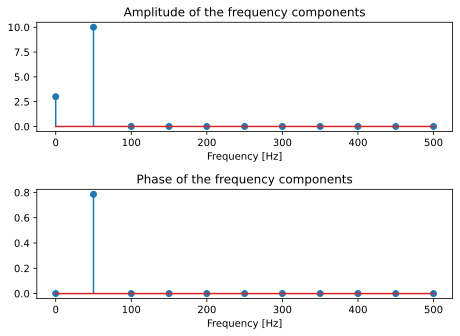

In [13]:
n = np.arange(N/2+1)       # Frequency data vector indices
f = n * dF                 # The frequency vector for our horizontal axes
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

In practice, we will not necessarily be interested in systematically representing the phase of sinusoidal components, so we can purify the code above to display only the amplitude of the spectrum:

In [14]:
X = np.fft.fft(u)
Amp = np.abs(X) / N     # We divide the amplitude by the number of samples (legacy of the DFT)
Amp = Amp[:N//2+1] * 2  # We multiply by 2 the amplitudes and we keep only the upper half of the
                        # spectrum for the convenience of the representation...
Amp[0] = Amp[0] / 2     # ... except for the DC component
 
dF = Fs / N             # The frequency resolution
dF

50.0

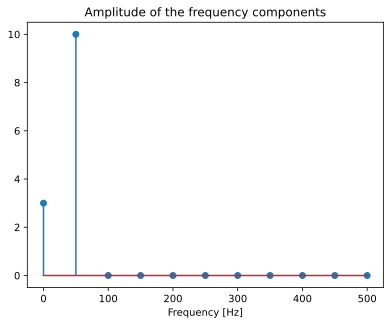

In [15]:
n = np.arange(N/2+1)         # Frequency data vector indices
f = n * dF                 # The frequency vector for our horizontal axes
 
plt.figure()
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.show()

## 9 - The problem of windowing a temporal signal

### 9.1 - Spectral leakage phenomenon

In the previous example, the samples of the temporal signal on which the FFT was applied delimited exactly one period of the sinusoid: 

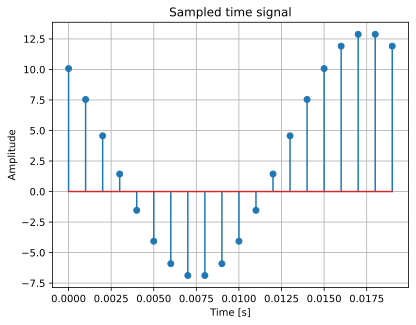

In [16]:
# Creation of the sampled time signal, containing a sine wave of frequency 50 Hz and
# 10V amplitude, and a DC component. Sampling happens every ms.
# We manage to get 20 samples, so that we have a complete period of the sine % wave.

N = 20                       # Number of samples
Ts = 0.001                   # Sampling period
fu = 50                      # Sine wave frequency
t = np.arange(0, N*Ts, Ts)   # Time vector creation
u = 3 + 10 * np.cos(2 * np.pi * fu * t + np.pi / 4)

plt.stem(t, u)
plt.title("Sampled time signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

The question is **what happens if the number of samples selected does not cover exactly one period of the sinusoid?**

Let's try to add a time sample, and apply the FFT to see the consequences:

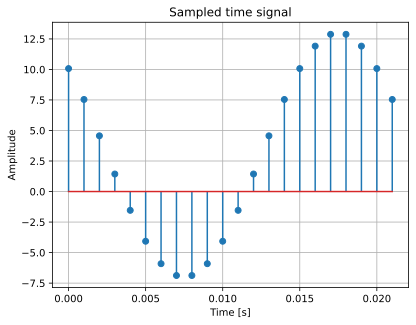

In [ ]:
# This time we take 22 samples so we d'ont get an exact period of the sine wave

N = 22                       # Number of samples - PAY ATTENTION, we need an even number of samples
Ts = 0.001                   # Sampling period
fu = 50                      # Sine wave frequency
t = np.arange(0, N*Ts, Ts)   # Time vector creation
u = 3 + 10 * np.cos(2 * np.pi * fu * t + np.pi / 4)

plt.stem(t, u)
plt.title("Sampled time signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [18]:
X = np.fft.fft(u)
  
Amp2=np.abs(X) / N           # We divide the amplitude by the number of samples (legacy of the DFT)
Amp2 = Amp2[:N//2+1] * 2     # We multiply by 2 the amplitudes and we keep only the upper half of the
                             # spectrum for the convenience of the representation...
Amp2[0] = Amp2[0] / 2        # ... except for the DC component
 
dF = Fs / N                  # The frequency resolution
dF

45.45454545454545

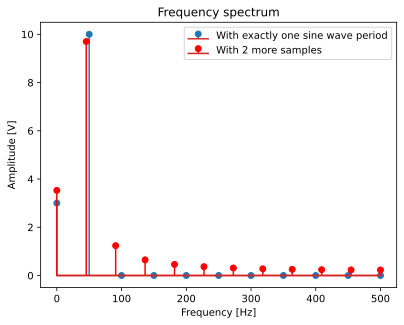

In [19]:
n = np.arange(N//2+1)   # Frequency data vector indices
f2 = n * dF             # The frequency vector for our horizontal axes
 
plt.figure()
plt.stem(f,Amp, label="With exactly one sine wave period")
plt.stem(f2,Amp2, "r", label="With 2 more samples")
plt.title('Frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.show()

Different things can be observed:

- The lines are not located at the same frequencies as before: here we have the impression of having a slightly lower frequency contained in the time signal compared to the previous case, while the sinusoidal component is still at 50 Hz.
- Other lines, corresponding to frequencies not present in our time signal, have appeared in the spectrum

The phenomenon observed is called **"Spectral leakage"**. It is due to the fact that the **DFT assumes that the sampled signal provided to it is repeated**.

Remember that to get the DFT, we started from the Fourier Transform, and that we had discretized the temporal signal. And to find the Fourier transform, we started from the Fourier series, which can be applied to a periodic signal only, and we assumed that the period of the signal was infinite to deal with the case of an aperiodic signal. In practice, one cannot provide data to cover an infinite time period to the algorithm. This algorithm therefore sees a limited time of observation of the signal, and considers that the data provided are repeated to infinity.

**If we provide data such that we have an integer number of periods of the sinusoid contained in the temporal signal, the fact that the sequence of data in question is recopied ad infinitum is not a problem : the juxtaposition of this sequence does not modify the content of the original signal:**

![](./img21.png)

On the other hand, **if we provide a temporal sequence that does not contain an integer number of periods of the sinusoid contained in the temporal signal, this juxtaposition will modify the signal perceived by the DFT** by bringing discontinuities, causing the perceived signal to no longer be identical to the original one. And **this modification leads the DFT to believe that certain frequencies are present in the signal, when in fact they are not**. This is what we can observe in the spectrum that Python has returned.

![](./img22.png)

### 9.2 - Windowing and frequency resolution

We can also explain the phenomenon in the frequency domain: remember that the frequency resolution depends on the sampling frequency on the one hand, and the number of samples collected on the other hand: $dF = \frac{F_s}{N}$. Here, we have modified the number of samples, but not the sampling frequency. Doing so, we changed the frequency resolution, which is no longer a multiple of the frequency of the sinusoid, which is 50 Hz :

In [20]:
dF=Fs/N
dF

45.45454545454545

The lines are therefore spread out in the spectrum.

To avoid this phenomenon, we will **window the signal in order to keep only a whole number of periods of our sinusoid**: the question is: how many to keep?

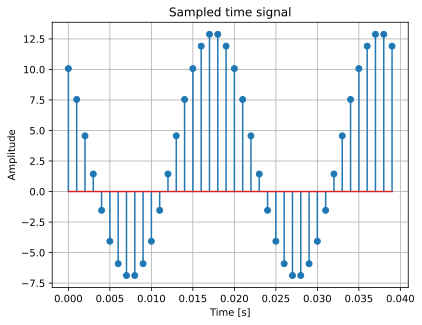

In [21]:
# Situation with 40 samples in a way we exactly have 2 complete periods of the sine wave.
 
N = 40                      # Number of samples
Ts = 0.001                  # Sampling period
Fs = 1 / Ts
fu = 50                     # Sine wave frequency
t = np.arange(0, N*Ts, Ts)  # Creation of the time vector
u = 3 + 10 * np.cos(2 * np.pi * fu * t + np.pi / 4)
 
plt.stem(t,u)
plt.title('Sampled time signal')
plt.xlabel('Time [s]')
plt.ylabel ('Amplitude')
plt.grid()
plt.show()

In [22]:
X = np.fft.fft(u)
Amp3 = np.abs(X) / N        # We divide the amplitude by the number of samples (legacy of the DFT)
Amp3 = Amp3[:N//2+1] * 2    # We multiply by 2 the amplitudes and we keep only the upper half of the
                            # spectrum for the convenience of the representation...
Amp3[0] = Amp3[0] / 2       # ... except for the DC component
 
dF = Fs / N                 # The frequency resolution
dF

25.0

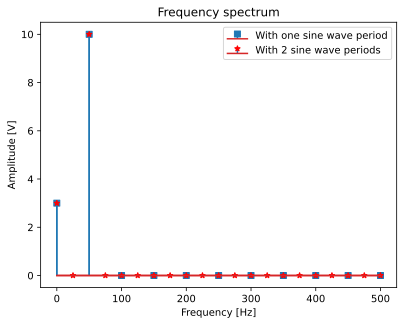

In [23]:
n = np.arange(N//2+1)       # Frequency data vector indices
f3 = n * dF                 # The frequency vector for our horizontal axes
 
plt.figure()
plt.stem(f, Amp, markerfmt="s", label="With one sine wave period")
plt.stem(f3, Amp3, markerfmt="r*", label="With 2 sine wave periods")
plt.title('Frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.show()

This time we observe that :

- The lines are well superimposed, at the same frequency and with the same amplitude
- The frequency resolution is smaller (25 Hz instead of 50 Hz) in the case where we have 2 complete periods of the sinusoid rather than one.

This is logical, since $dF = \frac{F_s}{N}$, and that $N$ has been multiplied by 2 without changing $F_s$. **By increasing the duration of observation of the signal, we increase the number of samples and we decrease the frequency resolution**. To have a finer frequency resolution without changing the sampling frequency, it is therefore necessary to increase the size of the observation window, and therefore the number of samples: this is called windowing.

### 9.3 - Windowing in practice - FYI : not implemented in Python in this lab

In the case presented here, with a simple sinusoid whose frequency is known, it is obviously very easy to choose a number of samples in order to have an integer number of periods of the sinusoid. But in practice, we do not know the frequency content of our signal: neither the lowest frequency contained, nor the highest, nor if the signal contains a fundamental frequency and harmonics or simply components at any frequency.

In practice, we must therefore use tools to limit the discontinuities and therefore the phenomenon of spectral leakage without sacrificing too much the content of the temporal signal, by applying windows on the temporal signal:

![](./img23.png)

Those tools are available in Numpy :

In [24]:
help(np.hamming)

Help on function hamming in module numpy:

hamming(M)
    Return the Hamming window.

    The Hamming window is a taper formed by using a weighted cosine.

    Parameters
    ----------
    M : int
        Number of points in the output window. If zero or less, an
        empty array is returned.

    Returns
    -------
    out : ndarray
        The window, with the maximum value normalized to one (the value
        one appears only if the number of samples is odd).

    See Also
    --------
    bartlett, blackman, hanning, kaiser

    Notes
    -----
    The Hamming window is defined as

    .. math::  w(n) = 0.54 - 0.46\cos\left(\frac{2\pi{n}}{M-1}\right)
               \qquad 0 \leq n \leq M-1

    The Hamming was named for R. W. Hamming, an associate of J. W. Tukey
    and is described in Blackman and Tukey. It was recommended for
    smoothing the truncated autocovariance function in the time domain.
    Most references to the Hamming window come from the signal processing
    l

In [25]:
help(np.blackman)

Help on function blackman in module numpy:

blackman(M)
    Return the Blackman window.

    The Blackman window is a taper formed by using the first three
    terms of a summation of cosines. It was designed to have close to the
    minimal leakage possible.  It is close to optimal, only slightly worse
    than a Kaiser window.

    Parameters
    ----------
    M : int
        Number of points in the output window. If zero or less, an empty
        array is returned.

    Returns
    -------
    out : ndarray
        The window, with the maximum value normalized to one (the value one
        appears only if the number of samples is odd).

    See Also
    --------
    bartlett, hamming, hanning, kaiser

    Notes
    -----
    The Blackman window is defined as

    .. math::  w(n) = 0.42 - 0.5 \cos(2\pi n/M) + 0.08 \cos(4\pi n/M)

    Most references to the Blackman window come from the signal processing
    literature, where it is used as one of many windowing functions for
    smoo

In [26]:
help(np.hanning)

Help on function hanning in module numpy:

hanning(M)
    Return the Hanning window.

    The Hanning window is a taper formed by using a weighted cosine.

    Parameters
    ----------
    M : int
        Number of points in the output window. If zero or less, an
        empty array is returned.

    Returns
    -------
    out : ndarray, shape(M,)
        The window, with the maximum value normalized to one (the value
        one appears only if `M` is odd).

    See Also
    --------
    bartlett, blackman, hamming, kaiser

    Notes
    -----
    The Hanning window is defined as

    .. math::  w(n) = 0.5 - 0.5\cos\left(\frac{2\pi{n}}{M-1}\right)
               \qquad 0 \leq n \leq M-1

    The Hanning was named for Julius von Hann, an Austrian meteorologist.
    It is also known as the Cosine Bell. Some authors prefer that it be
    called a Hann window, to help avoid confusion with the very similar
    Hamming window.

    Most references to the Hanning window come from the signa

Another tool gives the possiblity to try to identify the slowest component of any signal : this is called autocorrelation.

In [27]:
help(np.correlate)

Help on _ArrayFunctionDispatcher in module numpy:

correlate(a, v, mode='valid')
    Cross-correlation of two 1-dimensional sequences.

    This function computes the correlation as generally defined in signal
    processing texts [1]_:

    .. math:: c_k = \sum_n a_{n+k} \cdot \overline{v}_n

    with a and v sequences being zero-padded where necessary and
    :math:`\overline v` denoting complex conjugation.

    Parameters
    ----------
    a, v : array_like
        Input sequences.
    mode : {'valid', 'same', 'full'}, optional
        Refer to the `convolve` docstring.  Note that the default
        is 'valid', unlike `convolve`, which uses 'full'.

    Returns
    -------
    out : ndarray
        Discrete cross-correlation of `a` and `v`.

    See Also
    --------
    convolve : Discrete, linear convolution of two one-dimensional sequences.
    scipy.signal.correlate : uses FFT which has superior performance
        on large arrays.

    Notes
    -----
    The definition of c

## 10 - Sub-sampling problem

### 10.1 - In the time domain

In all the developments made above, we have always made sure to have a frequency content and a sampling period such that the Nyquist condition was respected: $\omega \le \omega_N$ with $\omega_N = \frac{\omega_s}{2}$.

We know (cfr paragraph 4) that if we do not respect this condition, it implies in the time domain that we do not have a sample per half period of our sinusoid. The last question that arises is: "what would this imply in the frequency domain?"

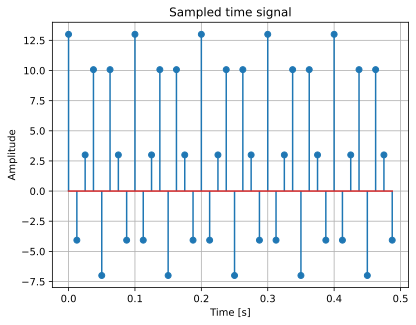

In [ ]:
# Sampled time signal creation, with a 10V amplitude sine wave of frequency 50 Hz and a DC component of 3V.
# We sample at 80 Hz.
# We only keep 40 samples, so wtih get a window of length 1/80 * 40 = 0.5 s, and thus a integer number of
# period of the sine wave : 0.1/0.02 = 5 périodes.
# This way we avoid spectral leakage.
 
Fs = 80                     # Sampling frequency => FNyquist = 40 Hz
Ts = 1 / Fs                 # Sample period
 
fu = 50                     # Sine wave frequency
 
N = 40                      # Number of samples
t = np.arange(0, N*Ts, Ts)  # Time vector creation
u = 3 + 10 * np.cos(2 * np.pi * fu * t)
 
plt.stem(t,u)
plt.title('Sampled time signal')
plt.xlabel('Time [s]')
plt.ylabel ('Amplitude')
plt.grid()
plt.show()

In [34]:
X = np.fft.fft(u)
Amp4 = np.abs(X) / N           # We divide the amplitude by the number of samples (legacy of the DFT)
Amp4 = Amp4[:N//2+1] * 2        # We multiply by 2 the amplitudes and we keep only the upper half of the spectrum
                               # for the convenience of the representation...
Amp4[0]=Amp4[0] / 2            # ... except for the DC component
 
dF = Fs / N                    # The frequency resolution
dF

2.0

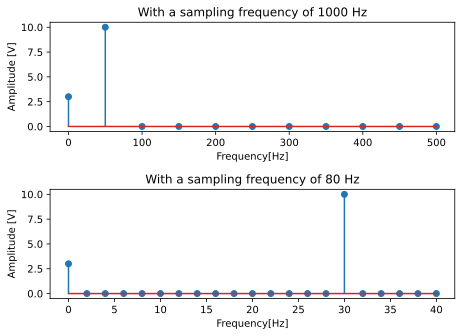

In [35]:
n = np.arange(N//2+1)         # Frequency data vector indices
f4 = n * dF                 # The frequency vector for our horizontal axes
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp,'*')
plt.title('With a sampling frequency of 1000 Hz')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude [V]')
plt.subplot(2,1,2)
plt.stem(f4,Amp4)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude [V]')
plt.title('With a sampling frequency of 80 Hz')
plt.tight_layout()
plt.show()

We observe different things in the graph below (the one above is the original one, with the same signal but sampled at 1000 Hz): 

- There is no spectral leakage phenomenon (logical, we defined N in order to avoid it)
- The frequency resolution is smaller than in the graph above (logical, N has doubled and Fs has gone from 1000 Hz to 80 Hz in the same time: we have more points for a smaller frequency range)
- The amplitudes of the components are correct: 3 V and 10 V.
- However, the line at 50 Hz is seen as being at 30 Hz. 

We had already explained in the time domain that the fact of not having a sample by half-period would be problematic: it is indeed the case here: the half-period lasts 10 ms, and we sample every 1/80 = 12.5 ms. The algorithm thinks that it is a sinusoid at 30 Hz which passes through the samples it has received: 

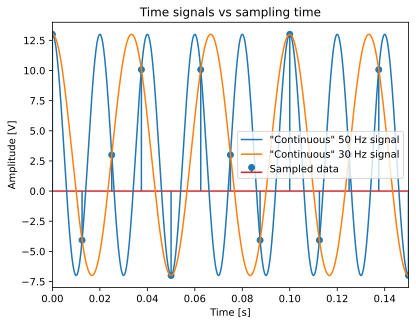

In [36]:
t2 = np.arange(0, t[-1]+0.0000005, 0.000001)   # New time vector creation
u2 = 3 + 10 * np.cos(2 * np.pi * 50 * t2)
u3 = 3 + 10 * np.cos(2 * np.pi * 30 * t2)
 
plt.figure()
plt.stem(t, u, label='Sampled data')
plt.plot(t2, u2, label='"Continuous" 50 Hz signal')
plt.plot(t2, u3, label='"Continuous" 30 Hz signal')
plt.xlim([0, 0.15])
plt.legend()
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [s]')
plt.title('Time signals vs sampling time')
plt.show()

It can be seen that it would be possible to make this sine wave pass through the points.

### 10.2 - In the frequency domain : Frequency aliasing phenomenon

How to explain that this line appears at 30 Hz rather than 50 Hz in the frequency domain this time?

- We remember that working with a discrete signal rather than a continuous one led to the recovery of spectral replicas in the signal spectrum.
- We also remember that we cannot observe frequency components whose frequency is higher than the Nyquist frequency $F_N = \frac{F_s}{2}$.

In the last case, we have a frequency (50 Hz) beyond the Nyquist frequency (40 Hz). Because of this, the "central frequency spectrum" does not remain between the bounds $[-F_N, F_N]$: it overflows further, on the replicas which are juxtaposed to it.

![](./img24.png)

The same is true for adjacent replicas: the right replica, centered in $F_s$ (80 Hz) brings a line in 80+50=130 Hz and another in 80-50=30 Hz. We say that **this line folds**, and we speak of the **phenomenon of spectral folding** or **"Frequency Aliasing"**.

The spectrum obtained via the FFT is then the superposition of the "central frequency spectrum" bounded between $[-F_N, F_N]$ and the overflows of the other replicas on it:

![](./img25.png)

We can therefore conclude that the line perceived at 30 Hz comes from the spectral replica centered at 80 Hz, and actually indicates the component at -50 Hz.

Note that the **replicas recovered on the "central frequency spectrum" may come from replicas that are not adjacent to it**: everything depends on the gap between $F_N$ and the frequency content of the signal. The larger the gap, the further the lines will fold.

Note also that in practice, this folding phenomenon will often lead us to filter the signal: without this, the high frequency components (such as noise for example) are likely to fold and "pollute" the useful frequency range of our signal.

## 11 - Conclusion

To conclude, it is important to highligth that in this Notebook, the various phenomena illustrated (spectral leakage, windowing problems, frequency aliasing) have been introduced to you one by one, in a progressive way. In practice, we often find ourselves with a time signal whose frequency content is unknown (a fundamental wave and harmonics or any content at all? period of the smallest frequency component contained in the signal? highest frequency contained in the signal?) and we are confronted with all these phenomena simultaneously.

Signal processing is a domain of experts, requiring years of practice before feeling comfortable with complicated cases. The idea of this Notebook is of course not to make you an expert in the field, but to remind you of the key notions seen in the course, and to give you the opportunity to practice a little bit these signal processing notions.